## What are the most demanded skills for the top 3 most popular data roles in Malaysia?

### Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Importing libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

1. Clean-up skill column

In [ ]:
df_MY = df[df['job_country'] == 'Malaysia']

df_skills = df_MY.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
47,Senior Data Engineering,sql
47,Senior Data Engineering,python
47,Senior Data Engineering,scala
47,Senior Data Engineering,nosql
47,Senior Data Engineering,java
...,...,...
785662,Business Analysis and Intelligence Manager,powerpoint
785662,Business Analysis and Intelligence Manager,visio
785677,"Engineer 3, Facilities",None
785738,Commercial Analyst - Start Now,powerpoint


2. Calculate skill count based on job_title_short

In [7]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
977,sql,Data Analyst,1095
272,excel,Data Analyst,1022
763,python,Data Scientist,830
978,sql,Data Engineer,799
761,python,Data Analyst,738
...,...,...,...
87,bash,Senior Data Analyst,1
89,bash,Senior Data Scientist,1
92,bigquery,Cloud Engineer,1
101,bitbucket,Business Analyst,1


3. Calculate skill percentage

In [53]:
df_job_title_count = df_MY['job_title_short'].value_counts().reset_index(name='job_total')

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['job_total'])

df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Analyst,1095,2527,43.332014
1,excel,Data Analyst,1022,2527,40.443213
2,python,Data Scientist,830,1491,55.667337
3,sql,Data Engineer,799,1404,56.908832
4,python,Data Analyst,738,2527,29.204590
...,...,...,...,...,...
1175,bash,Senior Data Analyst,1,465,0.215054
1176,bash,Senior Data Scientist,1,281,0.355872
1177,bigquery,Cloud Engineer,1,258,0.387597
1178,bitbucket,Business Analyst,1,1320,0.075758


4. Plot final findings

In [13]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

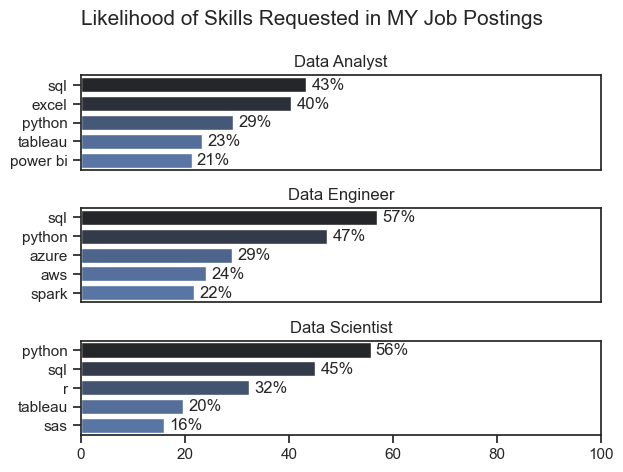

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 100)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
            ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in MY Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
